 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [301]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [302]:
# Reading whale returns
whale_returns_csv = Path("data/whale_returns.csv")
whale_df=pd.read_csv(whale_returns_csv)
whale_df['Date']=pd.to_datetime(whale_df['Date'])
whale_df.set_index('Date', inplace=True)
whale_df.rename(columns={'SOROS FUND MANAGEMENT LLC':'Soros Fund',
                'PAULSON & CO.INC. ':'Paulson & Co','TIGER GLOBAL MANAGEMENT LLC':'Tiger Global',
                'BERKSHIRE HATHAWAY INC':'BRK'}, inplace=True)
whale_df.sort_index(ascending=True, inplace=True)
whale_df.head()

,Soros Fund,Paulson & Co,Tiger Global,BRK
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [303]:
# Count nulls
whale_df.isnull().sum(axis=0)

Soros Fund      1
Paulson & Co    1
Tiger Global    1
BRK             1
dtype: int64

In [304]:
# Drop nulls
whale_df1=whale_df.dropna()
whale_df1.isnull().sum(axis=0)

Soros Fund      0
Paulson & Co    0
Tiger Global    0
BRK             0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [305]:
# Reading algorithmic returns
algo_returns_csv = Path("data/algo_returns.csv")
algo_df=pd.read_csv(algo_returns_csv)
algo_df['Date']=pd.to_datetime(algo_df['Date'])
algo_df.set_index('Date', inplace=True)
algo_df.sort_index(ascending=True, inplace=True)
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [306]:
# Count nulls
algo_df.isnull().sum(axis=0)

Algo 1    0
Algo 2    6
dtype: int64

In [307]:
# Drop nulls
algo_df1=algo_df.dropna()
algo_df1.isnull().sum(axis=0)

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [308]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("data/sp500_history.csv")
sp500_df=pd.read_csv(sp500_history_csv)
sp500_df['Date']=pd.to_datetime(sp500_df['Date'])
sp500_df.set_index('Date', inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [309]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [310]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close']=sp500_df['Close'].astype('float')
sp500_df.dtypes

Close    float64
dtype: object

In [311]:
# Calculate Daily Returns
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df['SP500 returns']=sp500_df['Close'].pct_change()
sp500_df.head()

,Close,SP500 returns
Date,,
2012-10-01,1444.49,NaN
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322


In [312]:
# Drop nulls
sp500_df1=sp500_df.dropna()
sp500_df1.isnull().sum(axis=0)

Close            0
SP500 returns    0
dtype: int64

In [313]:
# Rename Column
sp500_df1=sp500_df1.drop(['Close'], axis=1)
sp500_df1.head()

,SP500 returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [314]:
# # Concatenate all DataFrames into a single DataFrame
merge_df1=pd.concat([whale_df1,algo_df1, sp500_df1], axis=1, join='inner')
merge_df1.dropna(inplace=True)
merge_df1.dropna(inplace=True)
merge_df1.head()

,Soros Fund,Paulson & Co,Tiger Global,BRK,Algo 1,Algo 2,SP500 returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

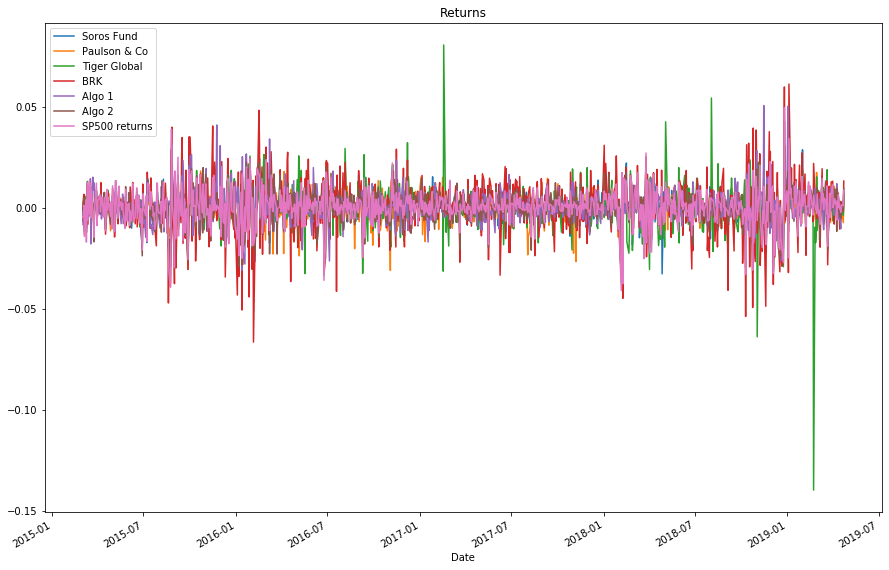

In [315]:
# Plot daily returns
merge_df1.plot(figsize=(15,10), title="Returns")

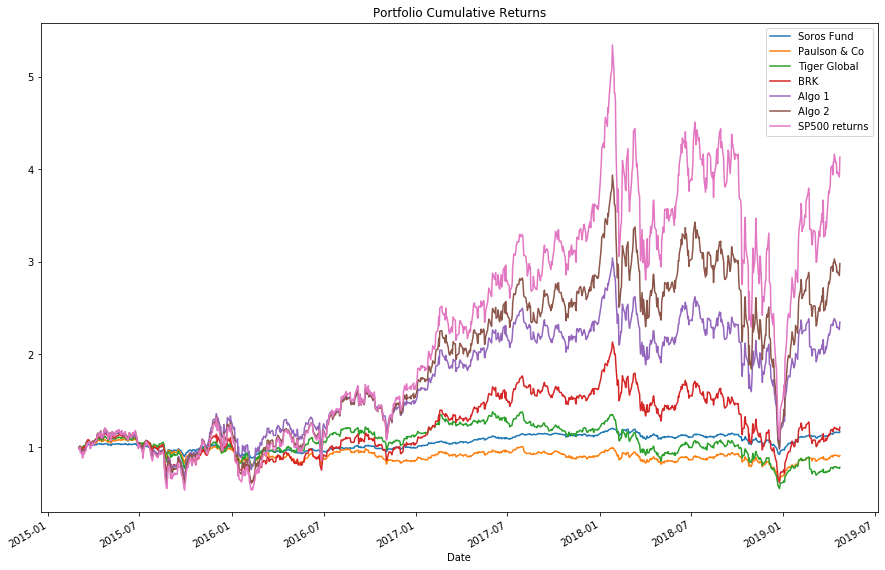

In [316]:
# Plot cumulative returns
merge_cum_df=((merge_df1+1).cumprod())
merge_cum_df.cumprod(axis=1).plot(figsize=(15,10), title="Portfolio Cumulative Returns")

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

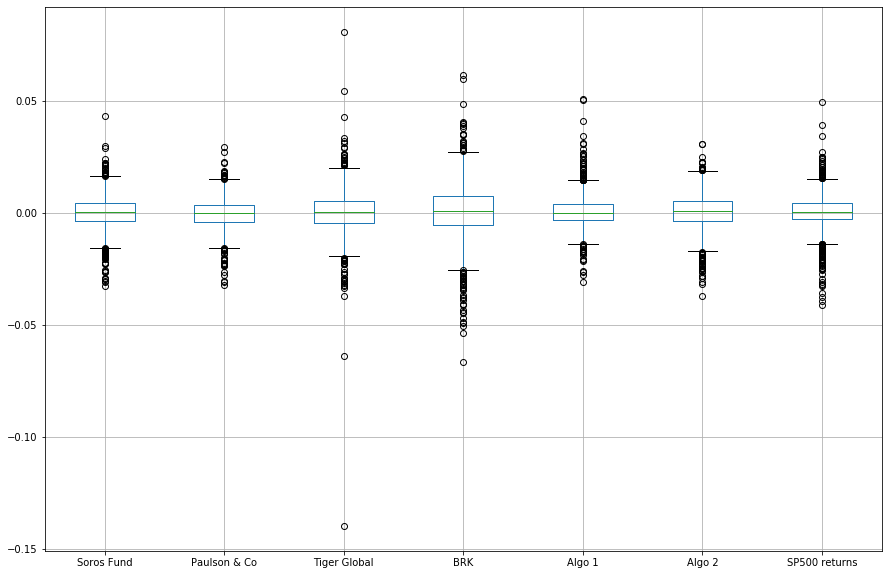

In [317]:
# Box plot to visually show risk
boxplot = merge_df1.boxplot(figsize=(15,10))

In [318]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
'''if we look at each portfolio an independent asset and 
do not worry about the assets underlying the portfolio'''
merge_std= merge_df1.std()

'''if we look at whale_returns and algo_returns as portfolios of portfolios and
run the calculation taking weight and covariance into account to calculate 
a portfolio standar deviation'''
weights_whale = np.asarray([0.25,0.25,0.25,0.25])
cov_matrix_whale = merge_df1.iloc[:,0:4].cov()
merge_std['whale_port']= round(np.sqrt(np.dot(weights_whale.T,np.dot(cov_matrix_whale, weights_whale))),6)


weights_algo = np.asarray([0.5,0.5])
cov_matrix_algo = merge_df1.iloc[:,4:6].cov()
merge_std['algo_port'] = round(np.sqrt(np.dot(weights_algo.T,np.dot(cov_matrix_algo, weights_algo))) ,6)

merge_std


Soros Fund       0.007895
Paulson & Co     0.007023
Tiger Global     0.010894
BRK              0.012919
Algo 1           0.007620
Algo 2           0.008342
SP500 returns    0.008554
whale_port       0.007946
algo_port        0.006409
dtype: float64

In [319]:
# Determine which portfolios are riskier than the S&P 500
riskier_std=merge_std.loc[merge_std>merge_std['SP500 returns']]
riskier_std

Tiger Global    0.010894
BRK             0.012919
dtype: float64

Based on the standar deviations both Algo portfolios are less
risky than the SP500. only Tiger and BRK are more risky, but the overall "whale" portfolio is less risky then the SP500

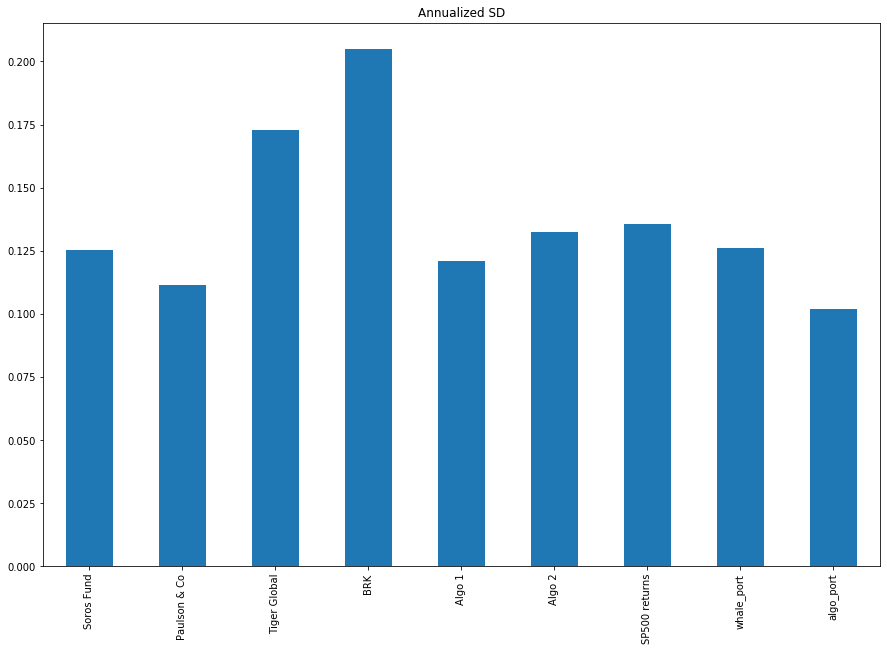

In [320]:
# Calculate the annualized standard deviation (252 trading days)
merge_annual_std=(merge_std* np.sqrt(252))
riskier_annual_std=merge_annual_std.loc[merge_annual_std>merge_annual_std['SP500 returns']]
riskier_annual_std
merge_annual_std.plot(kind="bar",figsize=(15,10), title="Annualized SD")

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

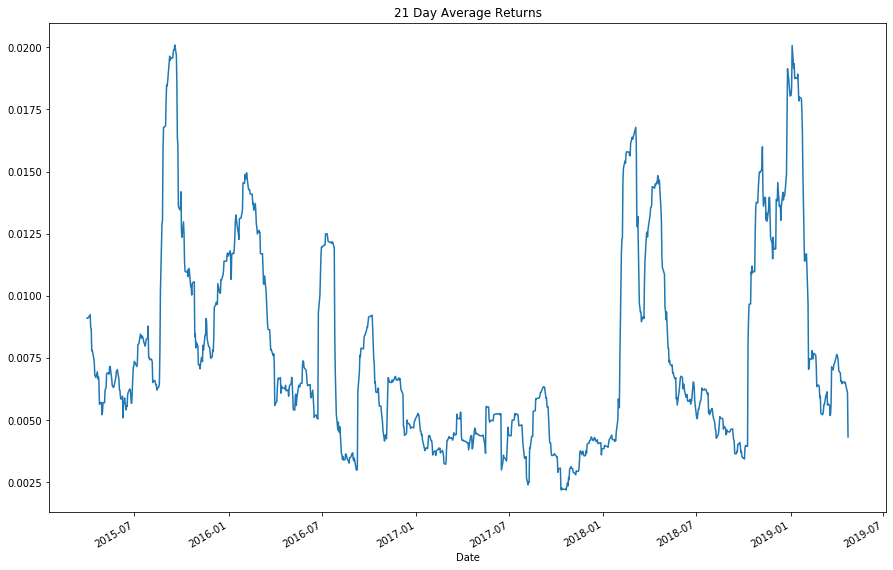

In [321]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
merge_df1['SP500 returns'].rolling(window=21).std().plot(figsize=(15,10), title="21 Day Average Returns")

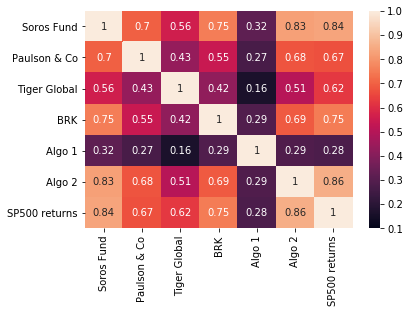

In [322]:
# Correlation
merge_df1.corr()
sns.heatmap(merge_df1.corr(), vmin=.1, vmax=1,annot=True)

All portfolios are positively correlated with the SP500 with Soros Fund and Algo 2 being the most highly correlated

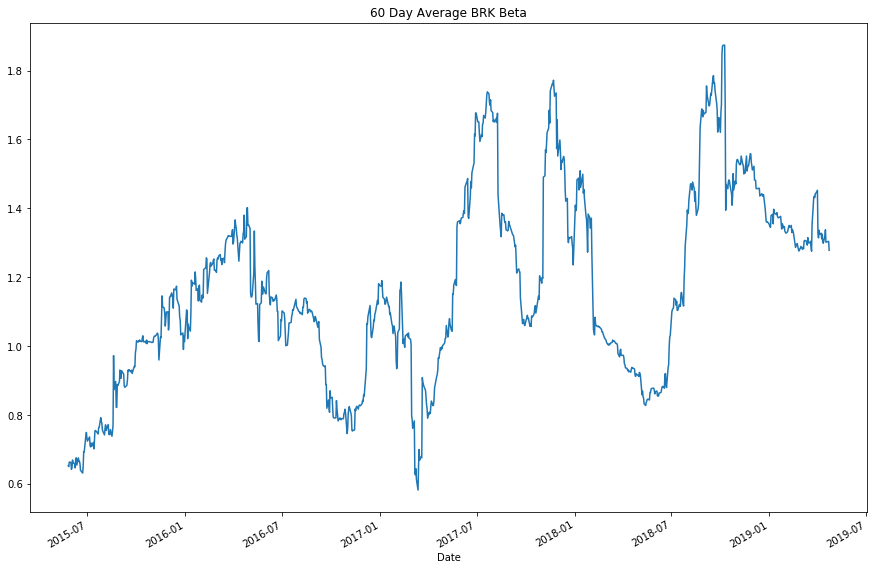

In [323]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#beta for a stock is =cov(Ri,Rb)/var(Rb) or cor(Ri,Rb)*(sd(Ri)/sd(Rb)) and 
#and the instructiosns are to calculate the 60 day beta for BRK 
rolling_cov = merge_df1['BRK'].rolling(window=60).cov(merge_df1['SP500 returns'])
rolling_var = merge_df1['SP500 returns'].rolling(window=60).var()
BRK_beta=rolling_cov/rolling_var
BRK_beta.plot(figsize=(15,10), title="60 Day Average BRK Beta")



### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

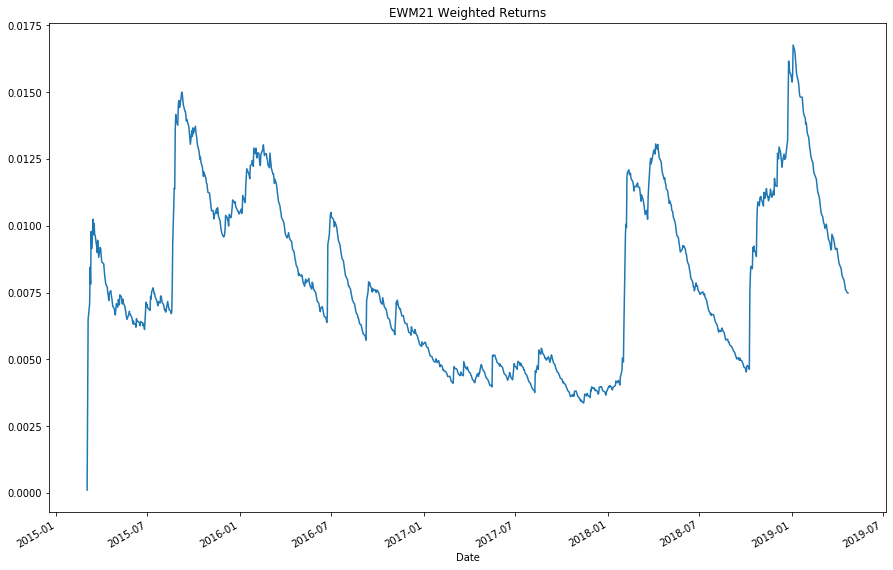

In [324]:
merge_df1['SP500 returns'].ewm(halflife=21).std().plot(figsize=(15,10), title="EWM21 Weighted Returns")

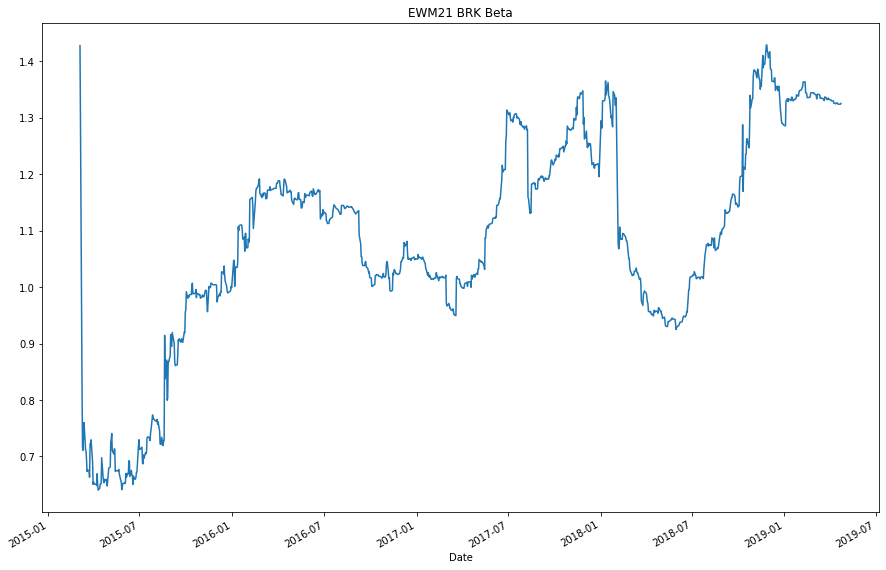

In [325]:
rolling_cov_ewm = merge_df1['BRK'].ewm(halflife=60).cov(merge_df1['SP500 returns'])
rolling_var_ewm = merge_df1['SP500 returns'].ewm(halflife=60).var()

BRK_beta_ewm=rolling_cov_ewm.iloc[2:]/rolling_var_ewm.iloc[2:]
BRK_beta_ewm.plot(figsize=(15,10), title="EWM21 BRK Beta")

with the EWM method a lot of the detail is lost compared to the rolling aver method also you have an edge effect where the first values appear to be artifacts

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [326]:
# Annualzied Sharpe Ratios
#SR=(annualied return-Risk free rate)/(annualized standard deviation), current RFR=.62%
sharpe_ratios = (merge_df1.mean() * 252-.0062) / (merge_df1.std() * np.sqrt(252))
sharpe_ratios


Soros Fund       0.306949
Paulson & Co    -0.539181
Tiger Global    -0.156911
BRK              0.591578
Algo 1           1.327395
Algo 2           0.454546
SP500 returns    0.602607
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

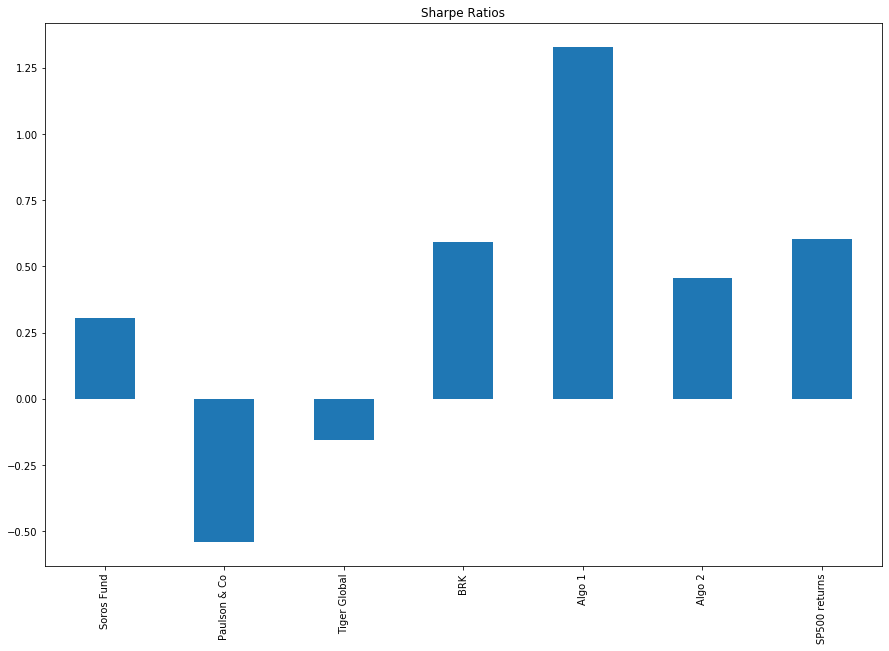

In [327]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar",figsize=(15,10), title="Sharpe Ratios")

In [328]:
best_sharpe=sharpe_ratios.loc[sharpe_ratios>sharpe_ratios['SP500 returns']]
best_sharpe

Algo 1    1.327395
dtype: float64

based on the sharpe ratio, only Algo 1 give better return per unit
risk compared to the SP500

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [329]:
# Read the first stock
#I am using a list of 10 biotechs currently developing covid-19 drugs, mostly vaccines
Tickers=['MRNA', 'GILD', 'REGN', 'DVAX', 'CYDY','JNJ', 'INO', 'VXRT', 'TBIO', 'GSK']
i=0

for x in Tickers:
    file_in=Path('./data/'+x+'.csv')
                                                 
    if i ==0:
        my_port_df= pd.read_csv(file_in,index_col='Date', parse_dates=True, infer_datetime_format=True)
        i+=1
    else:
        df= pd.read_csv(file_in,index_col='Date', parse_dates=True, infer_datetime_format=True)
        my_port_df=my_port_df.join(df)
        
my_port_df.head()

,MRNA,GILD,REGN,DVAX,CYDY,JNJ,INO,VXRT,TBIO,GSK
Date,,,,,,,,,,
2018-12-07,18.600000,64.476410,372.829987,10.54,0.58,140.546616,5.16,3.00,8.53,35.039848
2018-12-10,18.799999,63.852001,377.589996,10.87,0.57,140.382324,5.19,2.76,8.51,35.396828
2018-12-11,18.010000,64.069588,375.720001,10.82,0.54,141.580704,5.19,2.70,9.06,35.096214
2018-12-12,18.680000,64.466957,377.959991,11.64,0.54,142.160538,5.31,2.75,9.00,35.396828
2018-12-13,18.760000,64.257065,378.510010,10.49,0.52,142.875671,5.10,2.68,8.73,35.641071


In [330]:
# Read the second stock
# YOUR CODE HERE

In [331]:
# Read the third stock
# YOUR CODE HERE

In [332]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [333]:
# Reset the index
# YOUR CODE HERE

In [334]:
# Drop Nulls
my_port_df.isnull().sum(axis=0)
my_port_df1=my_port_df.dropna()
my_port_df1.isnull().sum(axis=0)

MRNA    0
GILD    0
REGN    0
DVAX    0
CYDY    0
JNJ     0
INO     0
VXRT    0
TBIO    0
GSK     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [335]:
# Calculate weighted portfolio returns
weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
my_port_ret=my_port_df1.pct_change(axis=0)
my_port_ret['portfolio return']=my_port_ret.mul(weights,axis=1).sum(axis=1)
my_port_ret.dropna(inplace=True)
my_port_ret.head()


,MRNA,GILD,REGN,DVAX,CYDY,JNJ,INO,VXRT,TBIO,GSK,portfolio return
Date,,,,,,,,,,,
2018-12-10,0.010753,-0.009684,0.012767,0.031309,-0.017241,-0.001169,0.005814,-0.080000,-0.002345,0.010188,-0.003961
2018-12-11,-0.042021,0.003408,-0.004952,-0.004600,-0.052632,0.008537,0.000000,-0.021739,0.064630,-0.008493,-0.005786
2018-12-12,0.037202,0.006202,0.005962,0.075786,0.000000,0.004095,0.023121,0.018519,-0.006623,0.008565,0.017283
2018-12-13,0.004283,-0.003256,0.001455,-0.098797,-0.037037,0.005030,-0.039548,-0.025455,-0.030000,0.006900,-0.021642
2018-12-14,-0.023454,-0.026429,0.007028,0.012393,-0.019231,-0.100379,-0.047059,-0.067164,-0.061856,-0.008698,-0.033485


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [336]:
merge_df2=pd.concat([merge_df1,my_port_ret], axis=1, join='inner')
merge_df2.head()

,Soros Fund,Paulson & Co,Tiger Global,BRK,Algo 1,Algo 2,SP500 returns,MRNA,GILD,REGN,DVAX,CYDY,JNJ,INO,VXRT,TBIO,GSK,portfolio return
Date,,,,,,,,,,,,,,,,,,
2018-12-10,-0.009854,-0.004736,-0.007709,-0.002190,-0.016156,-0.004270,0.001762,0.010753,-0.009684,0.012767,0.031309,-0.017241,-0.001169,0.005814,-0.080000,-0.002345,0.010188,-0.003961
2018-12-11,-0.001686,-0.003164,0.000611,0.001262,-0.008391,-0.002542,-0.000356,-0.042021,0.003408,-0.004952,-0.004600,-0.052632,0.008537,0.000000,-0.021739,0.064630,-0.008493,-0.005786
2018-12-12,0.009128,0.008147,0.002798,0.017475,0.002048,0.006321,0.005419,0.037202,0.006202,0.005962,0.075786,0.000000,0.004095,0.023121,0.018519,-0.006623,0.008565,0.017283
2018-12-13,-0.006231,-0.005056,0.000476,-0.004340,-0.012556,-0.010408,-0.000200,0.004283,-0.003256,0.001455,-0.098797,-0.037037,0.005030,-0.039548,-0.025455,-0.030000,0.006900,-0.021642
2018-12-14,-0.007269,-0.012273,-0.020367,-0.015391,-0.007552,-0.013574,-0.019087,-0.023454,-0.026429,0.007028,0.012393,-0.019231,-0.100379,-0.047059,-0.067164,-0.061856,-0.008698,-0.033485


In [337]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

merge_df2.dropna(inplace=True)
merge_df2.isnull().sum(axis=0)

Soros Fund          0
Paulson & Co        0
Tiger Global        0
BRK                 0
Algo 1              0
Algo 2              0
SP500 returns       0
MRNA                0
GILD                0
REGN                0
DVAX                0
CYDY                0
JNJ                 0
INO                 0
VXRT                0
TBIO                0
GSK                 0
portfolio return    0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [338]:
# Risk
merge_mp_std= merge_df2.iloc[:,0:17].std() * np.sqrt(252)
mp_std=merge_mp_std.iloc[0:7]

'''the portfolio standard div =ΣΣw(i)w(j)σ(i)σ(j)ρ(i,j) so using the weights and daily returns 
for my porfolia, we calculate the SD and pairwise covariance'''
weights_my_port = np.asarray([.1,.1,.1,.1,.1,.1,.1,.1,.1,.1])
cov_matrix_my_port = merge_df2.iloc[:,7:17].cov()
merge_mp_std['portfolio return']=round(((np.sqrt(np.dot(weights_my_port.T,np.dot
                                        (cov_matrix_my_port, weights_my_port)))
                                       * np.sqrt(252))),6)
mp_std['portfolio return']=merge_mp_std['portfolio return']
my_riskier_std=mp_std.loc[mp_std>mp_std['SP500 returns']]
my_riskier_std

Tiger Global        0.281985
BRK                 0.237182
portfolio return    0.281853
dtype: float64

based on this analysis and the new time horizon, Tiger and BRK are both
still more risky then the SP500 and my portfolio is also more risky

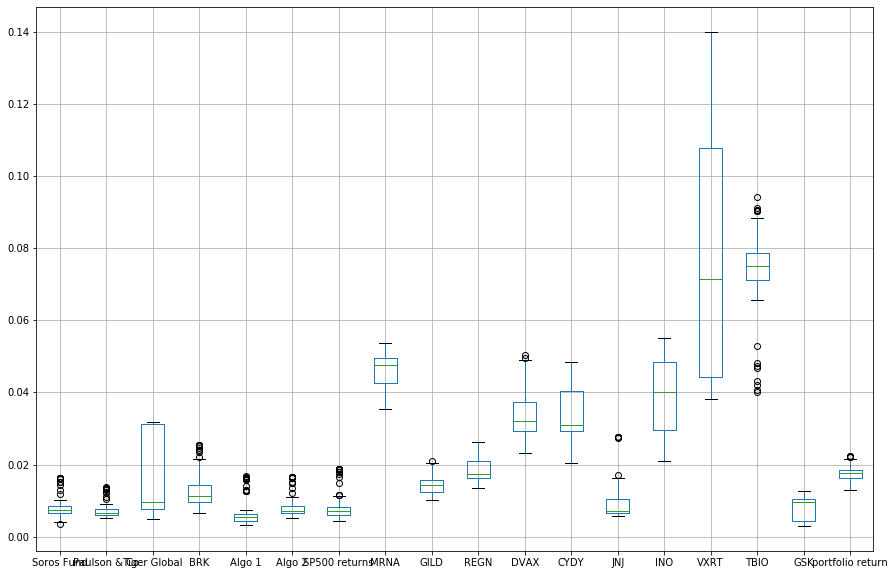

In [347]:
# Rolling
ax=merge_df2.rolling(window=21).std().boxplot(figsize=(15,10))



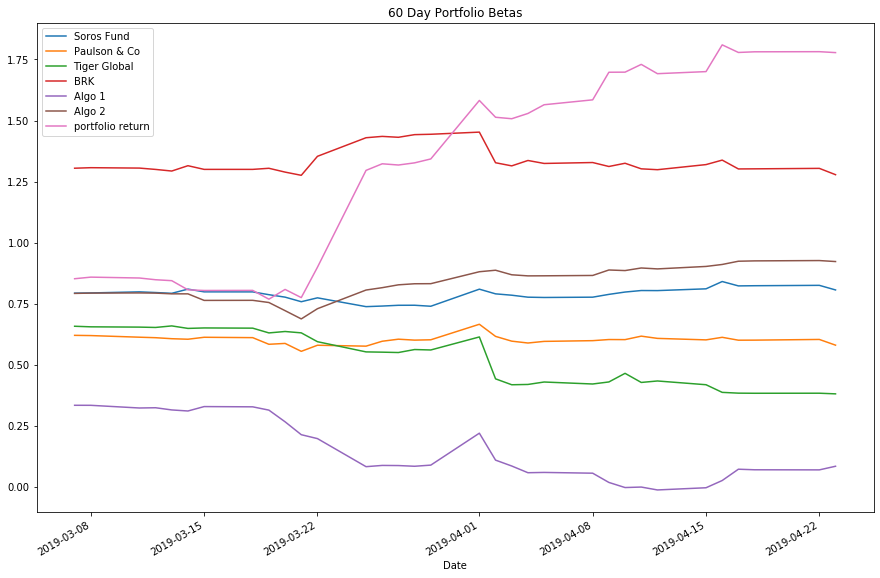

In [340]:
# Beta
'''the portfolio beta is the weighted of all the individual asset beta.'''
rolling_cov_mp = merge_df2.rolling(window=60).cov(merge_df2['SP500 returns'])
rolling_var_mp = merge_df2['SP500 returns'].rolling(window=60).var()
rolling_cov_mp.dropna(inplace=True)
rolling_var_mp.dropna(inplace=True)
mp_beta=rolling_cov_mp.div(rolling_var_mp, axis=0)
weight=[.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
mp_beta['portfolio return']=mp_beta.iloc[:,7:-1].mul(weight, axis=1).sum(axis=1)
ax=mp_beta['Soros Fund'].plot(figsize=(15,10),title="60 Day Portfolio Betas")
mp_beta['Paulson & Co'].plot(ax=ax)
mp_beta['Tiger Global'].plot(ax=ax)
mp_beta['BRK'].plot(ax=ax)
mp_beta['Algo 1'].plot(ax=ax)
mp_beta['Algo 2'].plot(ax=ax)
mp_beta['portfolio return'].plot(ax=ax)
ax.legend(['Soros Fund','Paulson & Co', 'Tiger Global', 'BRK', 'Algo 1', 'Algo 2', 'portfolio return'])

In [341]:
merged_df2_CM=merge_df2.cov()
weight=[.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]
betas_mp_df=round((merged_df2_CM.div(merge_df2['SP500 returns'].var())).iloc[0:17,6],5)
betas_mp_df['portfolio return']=betas_mp_df.iloc[7:].mul(weight, axis=0).sum(axis=0)
# betas_mp_df.loc['portfolio return']

In [342]:
# Annualzied Sharpe Ratios
annualized_RFR_return = (merge_df2.mean() * 252-.0062)
sharpes=round(annualized_RFR_return.div(merge_mp_std, axis='index'),4)
my_port_sharpe=sharpes.iloc[0:7]
my_port_sharpe['portfolio return']=sharpes['portfolio return']
my_port_sharpe

Soros Fund          2.1980
Paulson & Co        0.5485
Tiger Global       -1.2383
BRK                 2.4541
Algo 1              1.6386
Algo 2              2.0823
SP500 returns       1.8303
portfolio return   -1.1882
dtype: float64

In [343]:
#since I have the betas, here is the Treynor ratios
# treynor_my_port=round(annualized_RFR_return.div(betas_mp_df,axis=0),4)
# treynor_my_port

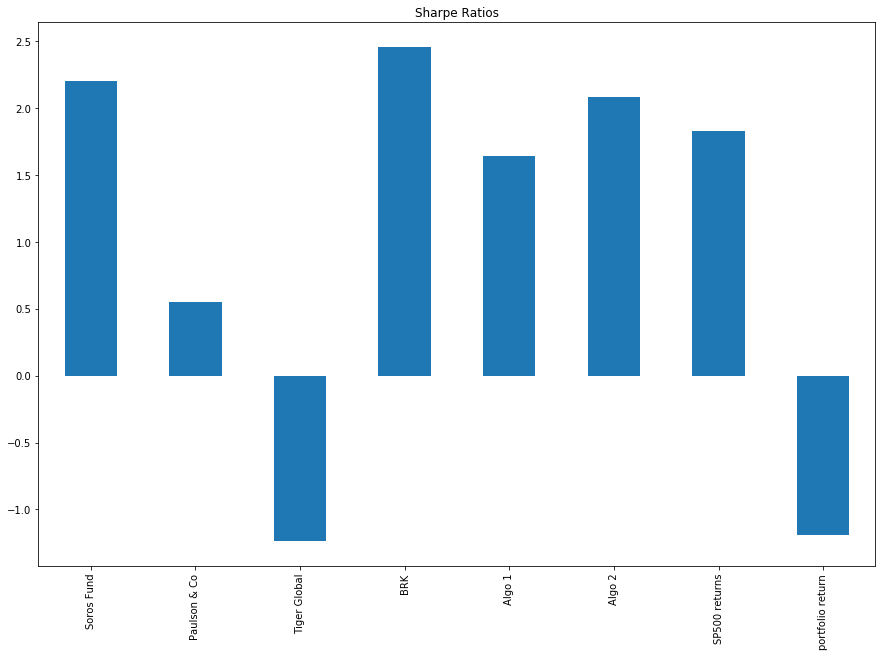

In [344]:
# Visualize the sharpe ratios as a bar plot
my_port_sharpe.plot(kind="bar",figsize=(15,10), title="Sharpe Ratios")

In [345]:
best_sharpe_mp=my_port_sharpe.loc[my_port_sharpe>my_port_sharpe['SP500 returns']]
best_sharpe_mp

Soros Fund    2.1980
BRK           2.4541
Algo 2        2.0823
dtype: float64

Based on the sharpe ratio for this time horizon, only Soros Fund, BRK and Algo 2 are better then the SP500.

## Include correlation analysis to determine which stocks (if any) are correlated

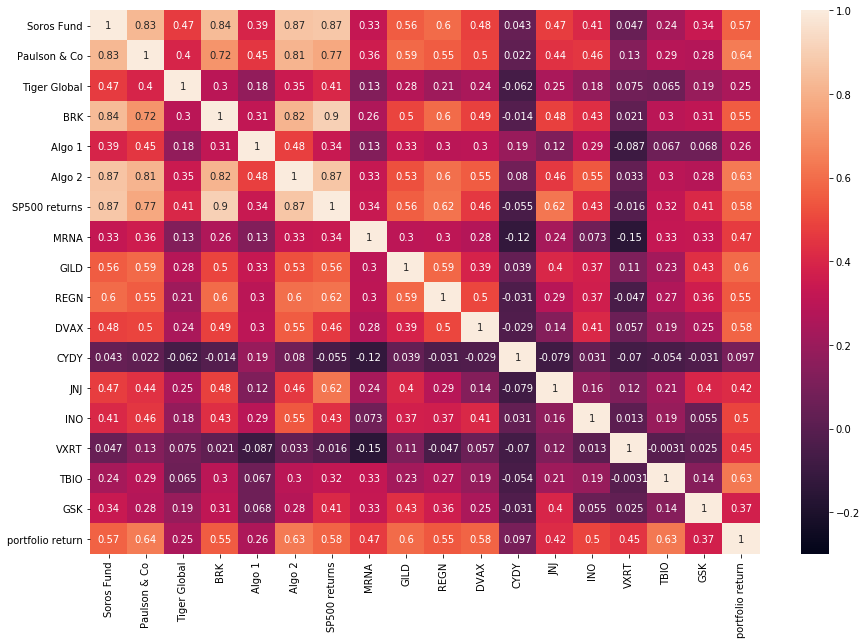

In [346]:
corr=merge_df2.corr()
corr
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(corr, vmin=-0.3, vmax=1.,annot=True, ax=ax)

based on these analysis, my portfolio highly underperformed the 
SP500 benchmark from the basis of Standard Deviation and Sharpe
Ratio.  Also overall portfolio is weakly cooratated to the SP500 
and interestingly more highly correlated then most of the underlying 
stocks.  Also the underlying stocks are only weakly correlated or
weakly negatively correlated with each other, despite all being in the same sector.  